# Recurrent Neural Networks using LSTM

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Training dataset

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
print(dataset_train)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
5      1/10/2012  313.70  315.72  307.30  621.43   8,824,000
6      1/11/2012  310.59  313.52  309.40  624.25   4,817,800
7      1/12/2012  314.43  315.26  312.08  627.92   3,764,400
8      1/13/2012  311.96  312.30  309.37  623.28   4,631,800
9      1/17/2012  314.81  314.81  311.67  626.86   3,832,800
10     1/18/2012  312.14  315.82  309.90  631.18   5,544,000
11     1/19/2012  319.30  319.30  314.55  637.82  12,657,800
12     1/20/2012  294.16  294.40  289.76  584.39  21,231,800
13     1/23/2012  291.91  293.23  290.49  583.92   6,851,300
14     1/24/2012  292.07  292.74  287.92  579.34   6,134,400
15     1/25/2012  287.68

In [3]:
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


# Feature Scalling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Timesteps = 60

60 time steps means that at each time 't' the RNN is going to look at the 60 stock prices.
Before time 't' that is the stock price is between 60 days before time 't' .
And based on the trends it is capturing during the 60 time steps will try to predict the next
output. So 60 time steps are the past information from which our RNN is going to try to learn and understand
some correlations or some trends.

In [5]:
#create a data structure with 60 timesteps and 1 output
x_train = []
y_train = []

for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60 : i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

#reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Building RNN

In [6]:
#building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout # to avoide overfitting

Using TensorFlow backend.


In [7]:
# initilising RNN
regressor = Sequential()

In [8]:
#adding the first LSTM layer and Dropout
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [9]:
#adding the second LSTM layer and Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
#adding the third LSTM layer and Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
#adding the fourth LSTM layer and Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [12]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [13]:
#compiling RNN
regressor.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [14]:
#fitting the RNN
regressor.fit(x_train, y_train, epochs = 100, batch_size= 32)

Epoch 1/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0542
Epoch 2/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0072
Epoch 3/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0047
Epoch 5/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0039
Epoch 10/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================] - 10s 

1198/1198 [==============================] - 10s 9ms/step - loss: 0.0016
Epoch 97/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0015


# Load the Stock Price of 2017

In [15]:
#load the stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
#getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

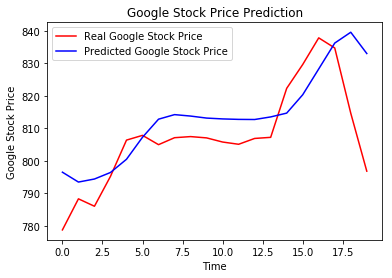

In [17]:
#visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()